In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["font.family"] = 'Malgun Gothic'

### [실습](Next!!!!)
* 기상 데이터 분석
* 데이터 수집 : !wget "url"
* 2010년부터 10년간 울릉도 지역의 기온과 풍속을 측정한 데이터

In [ ]:
# 데이터 셋 가져오기
!curl https://raw.githubusercontent.com/dongupak/BigDataAnalysis/main/weather.csv -o  weather.csv

In [ ]:
# 1. 데이터프레임 탐색
weather = pd.read_csv("weather.csv", index_col = 0)
weather.head()

In [ ]:
weather.info()

In [ ]:
# 2. 데이터 정제

# 1) 개별적인 열의 개수 확인 
print(weather.count())

# 2) 결측치 탐지 및 처리
missing_data = weather[weather['평균 풍속'].isna()]
print(missing_data )

In [ ]:
#3) 결측 값을 평균 풍속으로 채움, inplace를 True로 설정해 원본 데이터를 수정
mean_wind = round(weather['평균 풍속'].mean(), 2)
print(mean_wind )
weather.fillna(mean_wind, inplace=True)
weather.loc[["2012-02-11","2012-02-12","2012-02-13","2015-03-22","2015-04-01","2019-04-18"]]


In [ ]:
#3) 결측 값을 최대 풍속으로 채움, inplace를 True로 설정해 원본 데이터를 수정
max_wind = weather['최대 풍속'].mean()
max_wind =round(mean_wind ,2)
print(max_wind )
print()
weather['최대 풍속'].fillna(max_wind, inplace=True)
weather.loc[["2012-02-11","2012-02-12","2012-02-13"]]

In [ ]:
# 3.[데이터분석] "평균 기온" 열에서 어느 연도에  평균 기온이 가장 높았는지 연도별 평균 기온을 막대그래프로 그리기


In [ ]:
# 내 데이터프레임이 datetimeIndex 색인을 포함할 경우 연도 컬럼 추가
# weather = pd.read_csv("/content/sample_data/weather.csv",index_col = 0, parse_dates=True )
#weather.info()
# weather.head()
# weather['year'] = weather.index.year
# weather.head()

In [ ]:
# 3.1 데이터프레임 평탄화
weather.reset_index(inplace=True)
weather.info()

In [ ]:
weather.reset_index(inplace=True)
weather.head()

In [ ]:
weather.drop(columns=["index"])

In [ ]:
weather.drop(columns="index", inplace=True)

In [ ]:
weather

In [ ]:
# 3.2 weather['일시']의 연도 값을 추출하여 weather['year']에 저장하여 데이터프레임에 추가하기

weather['year'] = pd.DatetimeIndex(weather['일시']).year
weather.head()

# 3.3 'year' 별 평균 기온의 평균값을 집계하기

yearly_temp = weather.groupby('year')['평균 기온'].mean()
yearly_temp # y축

# 3.4 막대 그래프로 그리기
years = np.arange(2010,2021) # x축
plt.bar(years, yearly_temp, color="green")
plt.xlabel('연도')
plt.ylabel('평균 기온')
plt.title("연도별 평균 기온")
plt.show()


In [ ]:
# [데이터분석] 4. 어느 월에  평균 기온이 가장 높았는지 월별 평균 기온을 막대그래프로 그리기
# month 속성을 사용하여 달별로 구분하여 평균 기온 값을 담기
weather['month'] = pd.DatetimeIndex(weather['일시']).month

monthly_temp = weather.groupby('month')['평균 기온'].mean()

months = np.arange(1,13)
plt.bar(months, monthly_temp, color="green")
plt.xlabel('월')
plt.ylabel('평균 기온')
plt.title("월별 평균 기온")
plt.show()


In [ ]:
# [데이터 분석] 5. 기상 정보를 월별로 막대그래프로 그려서 분석하기
monthly_means = weather.groupby('month')[['평균 기온','최대 풍속', '평균 풍속']].mean()
monthly_means

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].bar(np.arange(1,13), monthly_means['평균 기온'], color = "red")
axs[0].set_title("월별 평균 기온")
axs[0].set_xlabel("월별")
axs[0].set_ylabel("평균 기온")


axs[1].bar(np.arange(1,13), monthly_means['최대 풍속'], color = "red")
axs[1].set_title("월별 최대 풍속")
axs[1].set_xlabel("월별")
axs[1].set_ylabel("최대 풍속")


axs[2].bar(np.arange(1,13), monthly_means['평균 풍속'], color = "blue")
axs[2].set_title("월별 최대 풍속")
axs[2].set_xlabel("월별")
axs[2].set_ylabel("평균 풍속")

In [ ]:
# [데이터분석] 6. 기상 정보를 연도별로 막대그래프로 그려서 분석하기
yearly_means = weather.groupby('year')[['평균 기온','최대 풍속', '평균 풍속']].mean()

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].bar(np.arange(2010,2021), yearly_means['평균 기온'], color = "red")
axs[0].set_title("연도별 평균 기온")
axs[0].set_xlabel("연도")
axs[0].set_ylabel("평균 기온")


axs[1].bar(np.arange(2010,2021),yearly_means['최대 풍속'], color = "red")
axs[1].set_title("연도별 최대 풍속")
axs[1].set_xlabel("연도")
axs[1].set_ylabel("최대 풍속")


axs[2].bar(np.arange(2010,2021),yearly_means['평균 풍속'], color = "blue")
axs[2].set_title("연도별 최대 풍속")
axs[2].set_xlabel("연도")
axs[2].set_ylabel("평균 풍속")

In [ ]:
# [데이터 분석] 7. 평균 풍속이 4.0이 넘는 달만 추출하기
## 필터링 : 특정한 조건 값을 주어서 데이터프레임의 값을 필터링하기

In [ ]:
# weather[weather['평균 풍속'] >= 4.0]
monthly_means.head()
monthly_means[monthly_means['평균 풍속'] >= 4.0]

Text(0, 0.5, '빈도수')

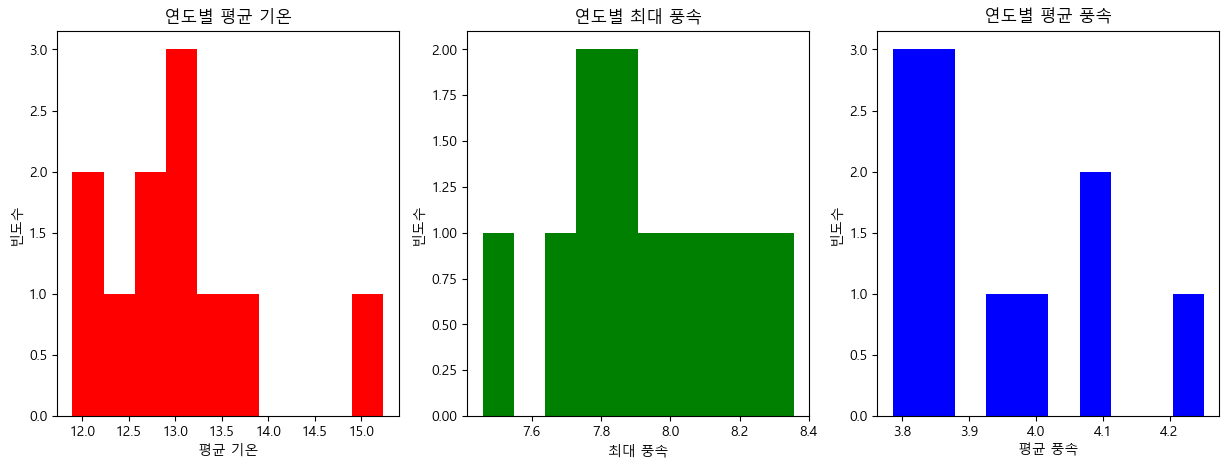

In [5]:
# [데이터 분석] 8. 연도별  '평균 기온', '최대 풍속', '평균 풍속'의 평균값을  각각 히스토그램으로 출력하시오.
# plt.hist(data, bins=10) : data에 있는 데이터포인트에 대한 범위을 주어진 구간(bins)으로 나누어,
## 각 구간에 데이터포인터가 들어가는 개수를 계산하여 그 빈도을 막대기로 그린것 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = 'Malgun Gothic'

#1. 데이터셋 로딩
weather = pd.read_csv("weather.csv")

# 2. 데이터 탐색
# 3. 결측치 처리 및 확인
mean_wind = weather['평균 풍속'].mean().round(2)
weather['평균 풍속'] = weather['평균 풍속'].fillna(mean_wind)

max_wind = weather['최대 풍속'].mean().round(2)
weather['최대 풍속'] = weather['최대 풍속'].fillna(max_wind)

weather.isna().sum()

# 4. 데이터프레임의 컬럼'일시'  -> DatetimeIndex로 변환 -> 'year'정보 추출 -> 데이터프레임에 'year' 열으로 추가
weather['year'] = pd.DatetimeIndex(weather['일시']).year

# 5. 연도별  '평균 기온', '최대 풍속', '평균 풍속'의 평균값 집계연산하기 
yearly_means = weather.groupby('year')[['평균 기온', '최대 풍속', '평균 풍속']].mean()

# 6. 히스토그램 그리기
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot the histogram for average temperature
axs[0].hist(yearly_means['평균 기온'], bins=10, color = "red")
axs[0].set_title("연도별 평균 기온")
axs[0].set_xlabel("평균 기온")
axs[0].set_ylabel("빈도수")


# Plot the histogram for maximum wind speed
axs[1].hist(yearly_means['최대 풍속'], bins=10, color="green")
axs[1].set_title("연도별 최대 풍속")
axs[1].set_xlabel("최대 풍속")
axs[1].set_ylabel("빈도수")

# Plot the histogram for average wind speed
axs[2].hist(yearly_means['평균 풍속'], bins=10, color="blue")
axs[2].set_title("연도별 평균 풍속")
axs[2].set_xlabel("평균 풍속")
axs[2].set_ylabel("빈도수")


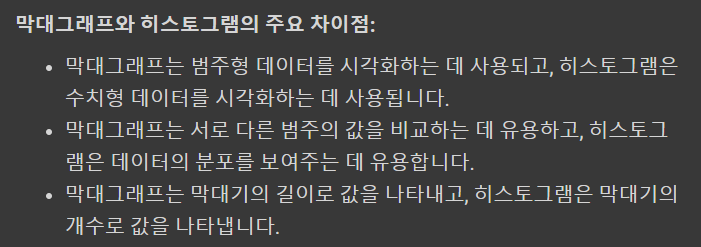

# [2차 프로그래밍 문제]
* 제출날짜: 2024-05-23까지 ipynb 소스자료 업로드하기
* cyber캠퍼스와 깃허브에 올리기
* 실습에서 사용한 weather.csv 파일을 판다스를 이용하여 데이터프레임을 만들어 다음과 같이 처리한다.

## 1) 이 데이터셋의 앞 3개 행과 마지막 3개의 행을 화면에 출력하시오.

## 2) 2015년 6월 6일의 "평균 기온"과 "풍속 정보"를 출력하시오


## 3) 가장 무더웠던 날짜을 추출해서 이 날의 기상 데이터을 출력하시오.

## 4) "평균 기온"이 30도를 넘는 날짜들을 찾아, 이 날의 기상 데이터를 출력하시오.

## 5) 연도별 "평균 기온"의 평균에 대한 추이를 선 그래프로 그리시오.

## 6) 연도별 "최대 풍속"의 평균을 막대 그래프로 그리시오.

## 7) 연도별 "평균 풍속"의 합을 히스토그램 그래프로 그리시오


## 8) 2015년과 2016년의 "평균 기온"의 평균을 비교하여 어느 해가 더 더웠는지 출력하시오.

## 9) 월별 "평균 기온" 의 합이 가장 적은 달과 가장 많은 달을 출력하시오.

## 10) 연도별 "최대 풍속"의 평균이 가장 큰 연도을 출력하시오.